In [1]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt 

In [2]:
cap = cv.VideoCapture('RyanRun.mp4')
template = cv.imread('hip.png', 0)

w, h = template.shape[::-1]
method = eval('cv.TM_CCOEFF_NORMED')

frame_count = 0
hip_pos = np.zeros((1082-870 + 1, 2))

rng = 20

first = True

x_position = []
y_position = []

while(cap.isOpened()): 
    if frame_count < 873: 
        cap.grab() 
        x1 = 0
        x2 = 480
        y1 = 0
        y2 = 640
    elif frame_count > 1082: 
        break
    else: 
        ret, frame = cap.read() 
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
        #print gray.shape #480 x 640
        
#         plt.imshow(gray[x1:x2, y1:y2], 'gray')
#         plt.show()
        res = cv.matchTemplate(gray[x1:x2, y1:y2], template, method) 
        
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
        top_left = max_loc # this is a relative position of the top left inside a small window
        hip_pos[(frame_count - 870)] = top_left 
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
#         print "topleft:", top_left
        if first == False:
            # you need to add previous top_left value back to the relative position
            absolute_top_left = (top_left[1] + x1, top_left[0] + y1)
            absolute_bottom_right = (bottom_right[1] + x1, bottom_right[0] + y1)
#         if math.hypot(top_left[0] - prev_top_left[0], top_left[1] - prev_top_left[1]) < 0.5: 
            
#             print absolute_top_left
        elif first == True: 
            absolute_top_left = (top_left[1], top_left[0])
            absolute_bottom_right = (bottom_right[1], bottom_right[0])
        
        x1 = max(int(absolute_top_left[0] - rng), 0)
        x2 = min(int(absolute_bottom_right[0] + rng), 480)
        y1 = max(int(absolute_top_left[1] - rng), 0)
        y2 = min(int(absolute_bottom_right[1] + rng), 640)
        
#         print "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2
#         print absolute_top_left
        
        x_position.append(x1)
        y_position.append(y1)

        #cv.rectangle(frame, top_left, bottom_right, (0, 255, 255), 5)
        cv.rectangle(frame, (absolute_top_left[1], absolute_top_left[0]), (absolute_bottom_right[1],absolute_bottom_right[0]), (0, 255, 255), 5)
        
        cv.imshow('Ryan\'s Run', frame)
        
        first = False
        
        if cv.waitKey(1) == ord('q'): 
            break
    frame_count += 1
        
cap.release()
cv.destroyAllWindows()

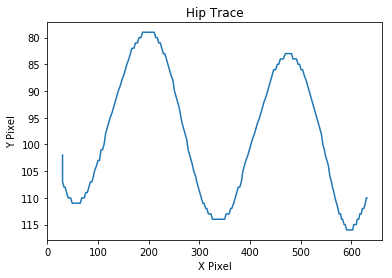

In [3]:
x_position = np.array(x_position)
y_position = np.array(y_position)
x_position += 30
y_position += 30

plt.plot(y_position, x_position)
plt.gca().invert_yaxis()
plt.title('Hip Trace')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()